work in progress

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.genfromtxt('fashion-mnist_train.csv',delimiter=',',skip_header=1)

In [3]:
data.shape

(60000, 785)

In [10]:
X = data[:,1:].reshape(-1,28,28,1)

y = np.zeros(shape=(len(data),10),dtype=int)
y[np.arange(len(data)),data[:,0].astype(int)] = 1

X.shape,y.shape

((60000, 28, 28, 1), (60000, 10))

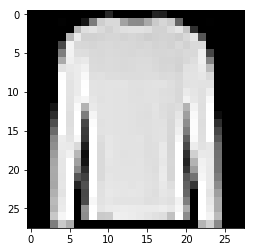

In [12]:
i = np.random.randint(len(X))

plt.imshow(X[i].reshape((28,28)),cmap='gray')
plt.show()

In [13]:
from keras.models import Model
from keras.layers import Input, Dense, Convolution2D, Flatten, MaxPooling2D, Dropout

In [14]:
input_layer = Input(shape=(28,28,1))
conv1 = Convolution2D(16, kernel_size=3,activation='relu')(input_layer)
conv2 = Convolution2D(32, kernel_size=3,activation='relu')(conv1)
pool = MaxPooling2D()(conv2)
hidden = Dense(128,activation='relu')(Flatten()(pool))
drop = Dropout(rate=0.5)(hidden)
output = Dense(10, activation='softmax')(drop)

model = Model(inputs=input_layer, outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy'])

In [15]:
model.fit(X,y,epochs=10,validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 81s 2ms/step - loss: 0.3305 - acc: 0.9487 - val_loss: 0.0707 - val_acc: 0.9704
Epoch 2/10
48000/48000 [==============================] - 80s 2ms/step - loss: 0.0722 - acc: 0.9706 - val_loss: 0.0645 - val_acc: 0.9733
Epoch 3/10
48000/48000 [==============================] - 79s 2ms/step - loss: 0.0636 - acc: 0.9742 - val_loss: 0.0618 - val_acc: 0.9752
Epoch 4/10
48000/48000 [==============================] - 90s 2ms/step - loss: 0.0576 - acc: 0.9767 - val_loss: 0.0545 - val_acc: 0.9783
Epoch 5/10
48000/48000 [==============================] - 86s 2ms/step - loss: 0.0526 - acc: 0.9788 - val_loss: 0.0582 - val_acc: 0.9773
Epoch 6/10
48000/48000 [==============================] - 80s 2ms/step - loss: 0.0502 - acc: 0.9798 - val_loss: 0.0546 - val_acc: 0.9793
Epoch 7/10
48000/48000 [==============================] - 80s 2ms/step - loss: 0.0467 - acc: 0.9811 - val_loss: 0.0569 - val_acc